In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
pokemon = pd.read_csv("Pokemon Database.csv")

In [ ]:
pokemon

Kollar så kolumnerna weight och height inte har null värden

Fanns värden på width som är 0.0 så testar att göra om dem till ett mean värde

In [ ]:
pokemon.isna().sum()

In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0.0, strategy="mean")
imputer.fit(pokemon[["Pokemon Weight"]])

SimpleImputer(missing_values=0.0)

In [40]:
pokemon[["Pokemon Weight"]] = imputer.transform(pokemon[["Pokemon Weight"]])

In [41]:
pokemon["Pokemon Weight"]

0         6.90000
1        13.00000
2       100.00000
3       155.50000
4        73.65475
          ...    
1230      4.90000
1231    380.00000
1232     35.00000
1233    303.00000
1234    240.00000
Name: Pokemon Weight, Length: 1235, dtype: float64

In [42]:
X = pokemon[["Pokemon Height"]]

In [43]:
y = pokemon["Pokemon Weight"]

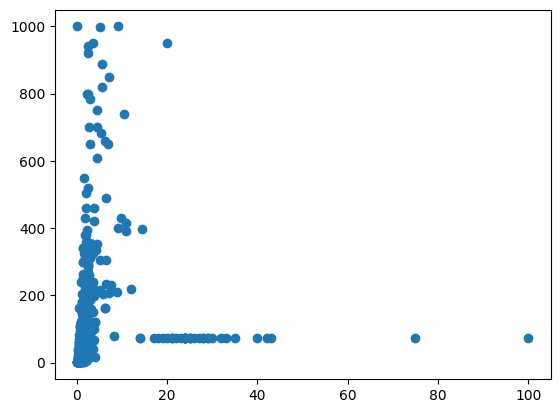

In [44]:
plt.scatter(X, y)

Blev inte så bra så testar att ta bort dem istället

In [48]:
pokemon = pd.read_csv("Pokemon Database.csv")

In [ ]:
pokemon

In [50]:
mask = pokemon["Pokemon Weight"] == 0.0

In [51]:
pokemon = pokemon[~mask]

In [52]:
X = pokemon[["Pokemon Height"]]

In [53]:
y = pokemon["Pokemon Weight"]

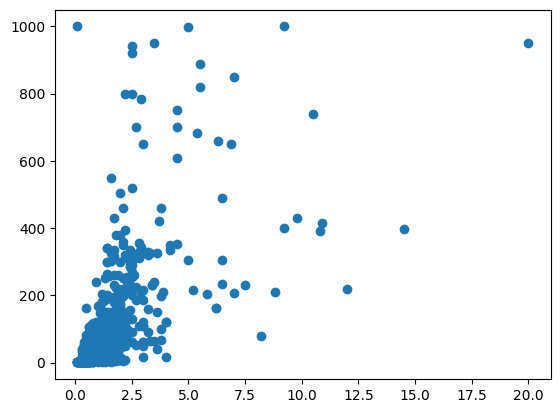

In [54]:
plt.scatter(X, y)

Ser bättre ut. Kanske inte så linjärt men det får gå

Importerar train_test_split och tränar datan med de olika modellerna

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

Linear Regression

Ja som vi ser, kanske inte det bästa, svårt att pricka alla punkter med denna spridning

In [85]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
result = lr.predict(X_test)

In [ ]:
result

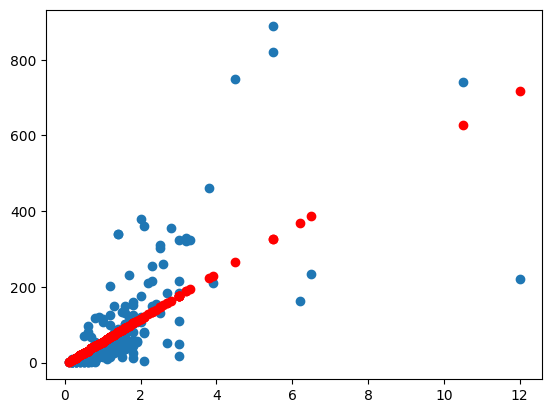

In [87]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, result, color="red")

In [88]:
from sklearn.metrics import r2_score, mean_absolute_error

In [89]:
print("LR r2_score: ", r2_score(y_test, result))
print("LR mean_absolute_error: ", mean_absolute_error(y_test, result))

LR r2_score:  0.5002688586970203
LR mean_absolute_error:  47.80574199343339


Decision Trees

Presterade bäst av de modellerna jag testar om vi kollar på r2_score. Konstigt nog då denna modellen brukar vara den sämsta.

In [90]:
from sklearn.tree import DecisionTreeRegressor

In [91]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
result = tree.predict(X_test)

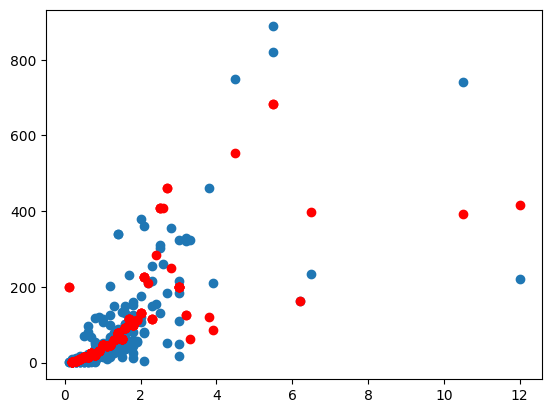

In [92]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, result, color="red")

In [93]:
print("Tree r2_score: ", r2_score(y_test, result))
print("Tree mean_absolute_error: ", mean_absolute_error(y_test, result))

Tree r2_score:  0.5779516579388757
Tree mean_absolute_error:  44.349517539683816


Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
forest = RandomForestRegressor(n_estimators=100)
forest.fit(X_train, y_train)
result = forest.predict(X_test)

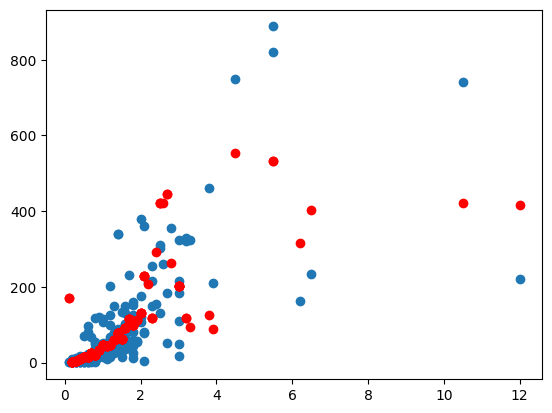

In [78]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, result, color="red")

In [79]:
print("Forest r2_score: ", r2_score(y_test, result))
print("Forest mean_absolute_error: ", mean_absolute_error(y_test, result))

Forest r2_score:  0.5481559972397168
Forest mean_absolute_error:  45.85291193731119


Closest Neighbors

Testade olika antal neighbors. Presterar helt okej vid n_neighbors=20

In [101]:
from sklearn.neighbors import KNeighborsRegressor

In [117]:
neighbors = KNeighborsRegressor(n_neighbors=20)
neighbors.fit(X_train, y_train)
result = neighbors.predict(X_test)

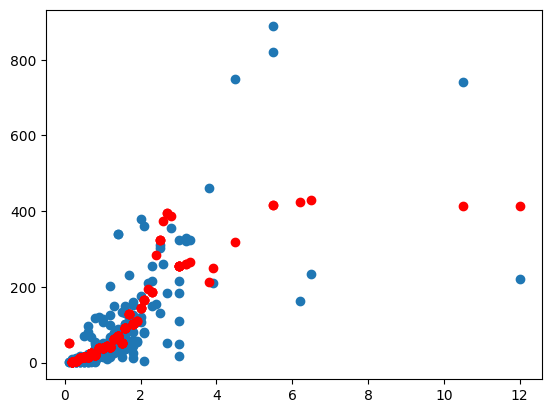

In [118]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, result, color="red")

In [119]:
print("Neighbors r2_score: ", r2_score(y_test, result))
print("Neighbors mean_absolute_error: ", mean_absolute_error(y_test, result))

Neighbors r2_score:  0.5541624486368317
Neighbors mean_absolute_error:  41.758
